In [2]:
import pandas as pd

In [3]:
# 读取加速/减速事件数据
acc_data = pd.read_excel('../GpsData/激进行为安全评估/加速事件聚类结果.xlsx')
dec_data = pd.read_excel('../GpsData/激进行为安全评估/刹车事件聚类结果.xlsx') 

In [6]:
# 提取驾驶人加速事件统计结果
acc_statis = acc_data.groupby(['phone','label'])['phone'].count()
acc_statis.name = 'acc_count'
acc_statis = acc_statis.reset_index()
acc_statis = acc_statis.pivot(index='phone', columns='label').reset_index()
acc_statis.columns = acc_statis.columns.map('_'.join)
acc_statis = acc_statis.rename(columns={'phone_':'phone'})
acc_statis = acc_statis.fillna(0)
acc_statis

,phone,acc_count_FA,acc_count_FG,acc_count_FM,acc_count_SA,acc_count_SG,acc_count_SM
0,10618973289,9.0,891.0,124.0,50.0,1830.0,516.0
1,14423970811,2.0,1013.0,130.0,70.0,1405.0,772.0
2,14423970816,1.0,392.0,55.0,13.0,875.0,300.0
3,14423970818,1.0,167.0,57.0,100.0,1412.0,832.0
4,14423970836,2.0,766.0,126.0,72.0,721.0,398.0
...,...,...,...,...,...,...,...
92,14462545326,2.0,420.0,60.0,32.0,646.0,339.0
93,14462545330,14.0,590.0,106.0,16.0,366.0,182.0
94,14462545344,8.0,2227.0,189.0,183.0,3057.0,1279.0
95,14462545352,78.0,862.0,1250.0,238.0,2004.0,2210.0


In [7]:
# 提取驾驶人减速事件统计结果
dec_statis = dec_data.groupby(['phone','label'])['phone'].count()
dec_statis.name = 'dec_count'
dec_statis = dec_statis.reset_index()
dec_statis = dec_statis.pivot(index='phone', columns='label').reset_index()
dec_statis.columns = dec_statis.columns.map('_'.join)
dec_statis = dec_statis.rename(columns={'phone_':'phone'})
dec_statis =dec_statis.fillna(0)
dec_statis

,phone,dec_count_FA,dec_count_FG,dec_count_FM,dec_count_SA,dec_count_SG,dec_count_SM
0,10618973289,77.0,562.0,244.0,155.0,917.0,620.0
1,14423970811,102.0,517.0,296.0,210.0,688.0,638.0
2,14423970816,22.0,264.0,69.0,61.0,362.0,285.0
3,14423970818,3.0,126.0,56.0,146.0,896.0,650.0
4,14423970836,106.0,377.0,314.0,133.0,312.0,390.0
...,...,...,...,...,...,...,...
92,14462545326,17.0,295.0,108.0,53.0,383.0,305.0
93,14462545330,15.0,547.0,148.0,21.0,262.0,155.0
94,14462545344,129.0,1360.0,524.0,248.0,1629.0,1122.0
95,14462545352,83.0,1288.0,842.0,125.0,1738.0,1008.0


In [8]:
# 合并驾驶人加速/减速统计结果，并关联车牌号
all_event_statis = pd.merge(acc_statis,dec_statis,how='outer',on='phone')
car_no = pd.read_excel('../GpsData/BasicData/车牌信息/车牌与企业匹配表_1676532775.xlsx')
all_event_statis = pd.merge(all_event_statis,car_no,how='left', left_on='phone', right_on='接入号')
all_event_statis

,phone,acc_count_FA,acc_count_FG,acc_count_FM,acc_count_SA,acc_count_SG,acc_count_SM,dec_count_FA,dec_count_FG,dec_count_FM,dec_count_SA,dec_count_SG,dec_count_SM,车牌,车牌颜色,企业,接入号
0,10618973289,9.0,891.0,124.0,50.0,1830.0,516.0,77.0,562.0,244.0,155.0,917.0,620.0,粤AHN580,黄色,广东弘晟物流有限公司,10618973289
1,14423970811,2.0,1013.0,130.0,70.0,1405.0,772.0,102.0,517.0,296.0,210.0,688.0,638.0,粤E35871,黄色,佛山市华之韵物流有限公司,14423970811
2,14423970816,1.0,392.0,55.0,13.0,875.0,300.0,22.0,264.0,69.0,61.0,362.0,285.0,粤ADE183,黄色,广州金波物流有限公司,14423970816
3,14423970818,1.0,167.0,57.0,100.0,1412.0,832.0,3.0,126.0,56.0,146.0,896.0,650.0,粤ABZ543,黄色,广州百骏达物流有限公司,14423970818
4,14423970836,2.0,766.0,126.0,72.0,721.0,398.0,106.0,377.0,314.0,133.0,312.0,390.0,粤E56943,黄色,顺德区龙江镇谭淑燕货运代理服务部,14423970836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,14462545326,2.0,420.0,60.0,32.0,646.0,339.0,17.0,295.0,108.0,53.0,383.0,305.0,粤Y38389,黄色,佛山市宏粤物流运输有限公司,14462545326
93,14462545330,14.0,590.0,106.0,16.0,366.0,182.0,15.0,547.0,148.0,21.0,262.0,155.0,粤E46966,黄色,佛山市福航物流有限公司,14462545330
94,14462545344,8.0,2227.0,189.0,183.0,3057.0,1279.0,129.0,1360.0,524.0,248.0,1629.0,1122.0,粤EX5038,黄色,佛山市高明区宏鑫物流运输有限公司,14462545344
95,14462545352,78.0,862.0,1250.0,238.0,2004.0,2210.0,83.0,1288.0,842.0,125.0,1738.0,1008.0,粤ACT593,黄色,广州市德诚物流有限公司,14462545352


In [12]:
# 提取激进加速/减速事件
acc_agg_data = acc_data[(acc_data['label']=='FA') | (acc_data['label']=='SA')]
dec_agg_data = dec_data[(dec_data['label']=='FA') | (dec_data['label']=='SA')]
acc_agg_data

,Unnamed: 0,phone,start_time,end_time,duration,min_v,max_v,mean_v,std_v,max_acc_lon,...,ss_max_acc_lon,ss_mean_acc_lon,ss_std_acc_lon,ss_max_jerk,ss_mean_jerk,ss_std_jerk,acc_PC1,acc_PC2,acc_label,label
79,79,10618973289,2023-01-31 17:26:03,2023-01-31 17:26:06,4.0,59.1,64.6,62.700000,2.458997,1.166667,...,1.289683,0.753568,1.742136,0.101402,-2.318706,1.687739,3.255255,1.203500,2,FA
84,84,10618973289,2023-01-31 19:13:46,2023-01-31 19:13:52,7.0,50.8,62.1,57.285714,5.208144,2.000000,...,3.636013,0.332012,3.290967,4.599276,0.252496,2.759214,5.803896,-4.011103,2,FA
181,181,10618973289,2023-02-03 07:08:54,2023-02-03 07:08:56,3.0,47.5,54.7,51.133333,3.600463,1.027778,...,0.898628,1.523881,2.269543,-1.463075,-5.299577,1.243224,3.954653,4.489861,2,FA
267,267,10618973289,2023-02-04 10:58:02,2023-02-04 10:58:05,4.0,49.7,55.5,52.475000,3.000417,1.250000,...,1.524316,0.682463,2.012168,2.741459,0.511234,2.600570,3.701884,-2.668803,2,FA
676,676,10618973289,2023-02-13 10:36:21,2023-02-13 10:36:24,4.0,49.8,55.9,53.700000,2.691963,1.222222,...,1.446105,0.326933,2.080705,-0.974176,-2.714898,0.677276,2.674258,2.320507,2,FA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240383,240383,14462545360,2023-02-17 13:23:22,2023-02-17 13:23:27,6.0,18.0,34.1,24.500000,6.515520,1.277778,...,1.602527,2.732680,1.496646,1.470320,0.322571,1.537406,3.621684,-0.978817,1,SA
240390,240390,14462545360,2023-02-17 13:27:04,2023-02-17 13:27:07,4.0,21.0,32.7,26.150000,4.950758,1.666667,...,2.697481,2.708978,2.202895,2.154779,-1.865916,2.771307,5.890803,-0.367408,1,SA
240396,240396,14462545360,2023-02-17 13:34:51,2023-02-17 13:34:52,2.0,19.0,24.6,21.800000,3.959798,1.555556,...,2.384637,2.708978,4.715078,-3.418673,-6.959808,0.605610,5.989905,7.300568,1,SA
240397,240397,14462545360,2023-02-17 13:34:54,2023-02-17 13:34:57,4.0,24.4,36.7,30.200000,5.334791,1.305556,...,1.680738,2.993401,1.074711,-0.289717,-1.809317,1.124758,3.583280,1.754297,1,SA


In [13]:
# 对驾驶人激进加速事件进行统计
acc_agg_statis = acc_agg_data.groupby(['phone','label'])['phone'].count()
acc_agg_statis.name = 'agg_acc_count'
acc_agg_statis = acc_agg_statis.reset_index()
acc_agg_statis = acc_agg_statis.pivot(index='phone', columns='label').reset_index()
acc_agg_statis.columns = acc_agg_statis.columns.map('_'.join)
acc_agg_statis = acc_agg_statis.rename(columns={'phone_':'phone'})
acc_agg_statis = acc_agg_statis.fillna(0)

In [14]:
# 对驾驶人激进制动事件进行统计
dec_agg_statis = dec_agg_data.groupby(['phone','label'])['phone'].count()
dec_agg_statis.name = 'agg_dec_count'
dec_agg_statis = dec_agg_statis.reset_index()
dec_agg_statis = dec_agg_statis.pivot(index='phone', columns='label').reset_index()
dec_agg_statis.columns = dec_agg_statis.columns.map('_'.join)
dec_agg_statis = dec_agg_statis.rename(columns={'phone_':'phone'})
dec_agg_data = dec_agg_data.fillna(0)

In [15]:
# 合并驾驶人激进加速/减速统计结果，并合并至驾驶人所有事件统计结果中
agg_event_statis = pd.merge(acc_agg_statis,dec_agg_statis,how='outer',on='phone')
all_event_statis = pd.merge(all_event_statis,agg_event_statis,how='left',on='phone')

In [16]:
warn_statis = pd.read_excel('../GpsData/BasicData/告警数据/驾驶人告警事件统计结果.xlsx')
all_warn_statis = pd.merge(all_event_statis,warn_statis[['车牌','碰撞预警','车距过近']],on='车牌',how='left')

In [17]:
mileage_statis = pd.read_excel('../GpsData/BasicData//驾驶人里程数据/驾驶人行驶里程.xlsx')
all_warn_statis = pd.merge(all_warn_statis, mileage_statis,on='phone',how='left')

In [18]:
all_warn_statis

,phone,acc_count_FA,acc_count_FG,acc_count_FM,acc_count_SA,acc_count_SG,acc_count_SM,dec_count_FA,dec_count_FG,dec_count_FM,...,车牌颜色,企业,接入号,agg_acc_count_FA,agg_acc_count_SA,agg_dec_count_FA,agg_dec_count_SA,碰撞预警,车距过近,mileage
0,10618973289,9.0,891.0,124.0,50.0,1830.0,516.0,77.0,562.0,244.0,...,黄色,广东弘晟物流有限公司,10618973289,9.0,50.0,77.0,155.0,148,490,3064.5
1,14423970811,2.0,1013.0,130.0,70.0,1405.0,772.0,102.0,517.0,296.0,...,黄色,佛山市华之韵物流有限公司,14423970811,2.0,70.0,102.0,210.0,0,0,2604.4
2,14423970816,1.0,392.0,55.0,13.0,875.0,300.0,22.0,264.0,69.0,...,黄色,广州金波物流有限公司,14423970816,1.0,13.0,22.0,61.0,114,245,1605.6
3,14423970818,1.0,167.0,57.0,100.0,1412.0,832.0,3.0,126.0,56.0,...,黄色,广州百骏达物流有限公司,14423970818,1.0,100.0,3.0,146.0,15,133,1980.2
4,14423970836,2.0,766.0,126.0,72.0,721.0,398.0,106.0,377.0,314.0,...,黄色,顺德区龙江镇谭淑燕货运代理服务部,14423970836,2.0,72.0,106.0,133.0,427,865,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,14462545326,2.0,420.0,60.0,32.0,646.0,339.0,17.0,295.0,108.0,...,黄色,佛山市宏粤物流运输有限公司,14462545326,2.0,32.0,17.0,53.0,87,394,1291.3
93,14462545330,14.0,590.0,106.0,16.0,366.0,182.0,15.0,547.0,148.0,...,黄色,佛山市福航物流有限公司,14462545330,14.0,16.0,15.0,21.0,93,462,3606.7
94,14462545344,8.0,2227.0,189.0,183.0,3057.0,1279.0,129.0,1360.0,524.0,...,黄色,佛山市高明区宏鑫物流运输有限公司,14462545344,8.0,183.0,129.0,248.0,20,60,7566.0
95,14462545352,78.0,862.0,1250.0,238.0,2004.0,2210.0,83.0,1288.0,842.0,...,黄色,广州市德诚物流有限公司,14462545352,78.0,238.0,83.0,125.0,358,1028,9334.3


In [19]:
all_warn_statis['warn_freq_100'] = all_warn_statis['车距过近']/all_warn_statis['mileage']*100
all_warn_statis['agg_acc_freq_100_SA'] = all_warn_statis['agg_acc_count_SA'] /all_warn_statis['mileage']*100
all_warn_statis['agg_acc_freq_100_FA'] = all_warn_statis['agg_acc_count_FA'] /all_warn_statis['mileage']*100
all_warn_statis['agg_dec_freq_100_SA'] = all_warn_statis['agg_dec_count_SA'] /all_warn_statis['mileage']*100
all_warn_statis['agg_dec_freq_100_FA'] = all_warn_statis['agg_dec_count_FA'] /all_warn_statis['mileage']*100
all_warn_statis = all_warn_statis.fillna(0)
all_warn_statis['agg_acc_freq_100'] = all_warn_statis['agg_acc_freq_100_SA']+all_warn_statis['agg_acc_freq_100_FA']
all_warn_statis['agg_dec_freq_100'] = all_warn_statis['agg_dec_freq_100_SA']+ all_warn_statis['agg_dec_freq_100_FA']
all_warn_statis['agg_freq_100'] = all_warn_statis['agg_acc_freq_100']+ all_warn_statis['agg_dec_freq_100']
all_warn_statis = all_warn_statis.sort_values('agg_freq_100',ascending=True).reset_index(drop=True)
all_warn_statis['id'] = [i+1 for i in range(len(all_warn_statis))]

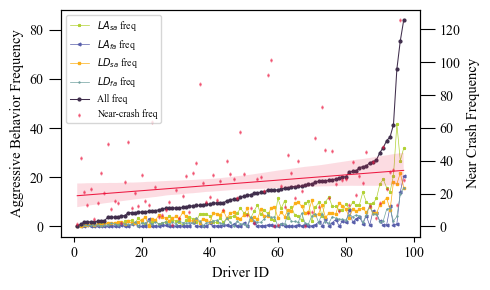

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',family='Times New Roman')
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(all_warn_statis['id'], all_warn_statis['agg_acc_freq_100_SA'],'-*', color='#b2d235', linewidth=0.5, label='$LA_{sa}$ freq', markersize=2)
ax.plot(all_warn_statis['id'], all_warn_statis['agg_acc_freq_100_FA'],'-<', color='#585eaa', linewidth=0.5, label='$LA_{fa}$ freq', markersize=2)
ax.plot(all_warn_statis['id'], all_warn_statis['agg_dec_freq_100_SA'],'-s', color='#fcaf17', linewidth=0.5, label='$LD_{sa}$ freq', markersize=2)
ax.plot(all_warn_statis['id'], all_warn_statis['agg_dec_freq_100_FA'],'-+', color='#70a19f', linewidth=0.5, label='$LD_{fa}$ freq', markersize=2)
ax.plot(all_warn_statis['id'], all_warn_statis['agg_freq_100'], '-o', linewidth=0.75, color='#402e4c', label='All freq', markersize=2)
ax.set_xlabel('Driver ID',fontsize=10.5)
ax.set_ylabel('Aggressive Behavior Frequency',fontsize=10.5)
ax.tick_params('y', size=9)

# 创建第二个轴对象
ax2 = ax.twinx()
sns.regplot(data = all_warn_statis, x='id',y ='warn_freq_100',color='#ed1941',marker='d',scatter_kws={'s':2,'alpha':0.5},line_kws={'lw':0.75},label='Near-crash freq')
# 绘制第二个数据集（右轴）
ax2.set_ylabel('Near Crash Frequency',fontsize=10.5)
ax2.tick_params('y',size=10.5)
# 添加图例
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best', fontsize=7)

# plt.grid(linestyle='--', linewidth=0.5,alpha=0.5)
plt.tight_layout()
plt.savefig('../GpsFigure/激进行为安全评估/驾驶员激进加速制动事件排名.pdf')

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 假设你的数据存储在名为all_warn_statis的DataFrame中

# 获取需要聚类的特征列agg_freq_100
features = all_warn_statis[['agg_freq_100']].values

# 使用KMeans进行聚类，设定聚类数为3
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
labels = kmeans.labels_

# 将聚类结果添加到DataFrame中
all_warn_statis['cluster'] = labels

# 选择需要合并的列
cols_to_merge = ['agg_freq_100', 'warn_freq_100']

# 使用 melt() 函数进行列合并
merged_df = pd.melt(all_warn_statis, id_vars=['cluster'], value_vars=cols_to_merge, var_name='Column', value_name='Value')

# 自定义调色板
custom_palette = sns.color_palette(['#a3cf62', '#f58f98'])  # 使用十六进制颜色代码定义调色板

/Users/zhangjianhua/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


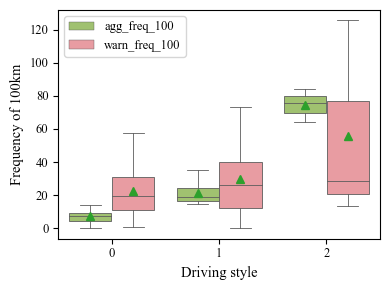

In [24]:
plt.figure(figsize=(4,3))
sns.boxplot(x="cluster", y="Value", hue="Column",
               data=merged_df,palette=custom_palette, linewidth=0.6, order=[0,1,2],showfliers=False,showmeans=True, medianprops={'visible': True})
plt.xlabel('Driving style',fontsize=10.5)
plt.xticks(fontsize=9)
plt.ylabel('Frequency of 100km', fontsize=10.5)
plt.yticks(fontsize=9)
plt.legend(fontsize=9, loc= 'upper left')
plt.tight_layout()
plt.savefig('../GpsFigure/激进行为安全评估/驾驶员激进驾驶行为与碰撞预警箱型图.pdf')

In [25]:
all_warn_statis.to_excel('../GpsData/激进行为安全评估/驾驶人加速制动碰撞预警统计.xlsx', index=False)

                     agg_acc_freq_100_SA  agg_acc_freq_100_FA  \
agg_acc_freq_100_SA         0.000000e+00         9.637435e-10   
agg_acc_freq_100_FA         9.637435e-10         0.000000e+00   
agg_dec_freq_100_SA         5.207480e-20         1.651762e-06   
agg_dec_freq_100_FA         5.082068e-10         2.182808e-22   
warn_freq_100               8.154898e-02         1.971652e-02   

                     agg_dec_freq_100_SA  agg_dec_freq_100_FA  warn_freq_100  
agg_acc_freq_100_SA         5.207480e-20         5.082068e-10       0.081549  
agg_acc_freq_100_FA         1.651762e-06         2.182808e-22       0.019717  
agg_dec_freq_100_SA         0.000000e+00         6.746490e-13       0.007004  
agg_dec_freq_100_FA         6.746490e-13         0.000000e+00       0.000388  
warn_freq_100               7.003743e-03         3.875949e-04       0.000000  


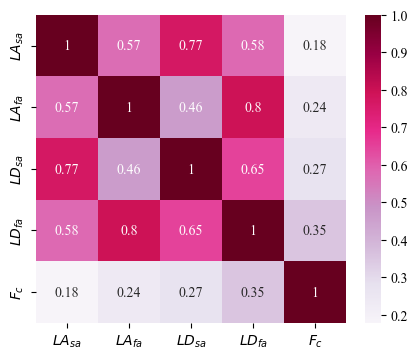

In [26]:
from scipy.stats import pearsonr, spearmanr # type: ignore
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设你的DataFrame为df，包含四列数据：'col1', 'col2', 'col3', 'col4'
corr_matrix = all_warn_statis[['agg_acc_freq_100_SA','agg_acc_freq_100_FA','agg_dec_freq_100_SA','agg_dec_freq_100_FA','warn_freq_100']].corr()

# 计算相关系数矩阵和显著性矩阵
corr_values = corr_matrix.values
p_values = corr_matrix.copy()

# 遍历相关系数矩阵的行列索引
for i, col1 in enumerate(['agg_acc_freq_100_SA','agg_acc_freq_100_FA','agg_dec_freq_100_SA','agg_dec_freq_100_FA','warn_freq_100']):
    for j, col2 in enumerate(['agg_acc_freq_100_SA','agg_acc_freq_100_FA','agg_dec_freq_100_SA','agg_dec_freq_100_FA','warn_freq_100']):
        if i != j:
            # 计算相关系数和显著性
            coef, p_value = pearsonr(all_warn_statis[col1], all_warn_statis[col2])
            p_values.iloc[i, j] = p_value
        else:
            p_values.iloc[i, j] = 0.0

print(p_values)

fig,ax = plt.subplots(figsize=(5,4))
# 绘制相关图
# sns.heatmap(corr_values, annot=p_values, cmap='coolwarm', fmt=".3f", center=0, linewidth=0.5)
sns.heatmap(corr_values, annot=True, cmap='PuRd', xticklabels=['$LA_{sa}$', '$LA_{fa}$', '$LD_{sa}$', '$LD_{fa}$' ,'$F_{c}$'],  # type: ignore
            yticklabels=['$LA_{sa}$', '$LA_{fa}$', '$LD_{sa}$', '$LD_{fa}$' ,'$F_{c}$']  , ax=ax, ) # type: ignore
plt.savefig('../GpsFigure/激进行为安全评估//碰撞预警与激进加速制动相关性.pdf')


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family=' Times New Roman')

def show_mode_freq(data):
    plt.figure(figsize=(4.5,2))
    plt.fill_between(x=[0.6,30.4],y1=3,y2=5,color='#d3d7d4',alpha=0.75, zorder=1)
    plt.fill_between(x=[0.6,30.4],y1=5,y2=6,color='#d3d7d4',alpha=0.5, zorder=1)
    plt.fill_between(x=[0.6,30.4],y1=6,y2=7,color='#d3d7d4',alpha=0.25, zorder=1)
    plt.fill_between(x=[0.6,30.4],y1=2,y2=3,color='#d3d7d4',alpha=0.5, zorder=1)
    plt.fill_between(x=[0.6,30.4],y1=1,y2=2,color='#d3d7d4',alpha=0.25, zorder=1)
    x = [[i+1-0.2, i+1, i+1+0.2] for i in range (30)]
    for i in range (30):
        plt.plot(x[i],data[['col1','col2', 'col3']].iloc[i], c='#999d9c' , lw=0.5,zorder=8)
        plt.scatter(x[i], data[['col1','col2','col3']].iloc[i], c='#7fb80e' , s=4, alpha=0.75, zorder=10)
        plt.axhline(y=4, c='#102b6a', lw=0.5, linestyle='--', alpha=0.5,zorder=8)
    # 是示图形
    
    plt.yticks(fontsize=9)
    plt.xticks(fontsize=9)
    plt.xlabel('Sort', fontsize=10.5)
    plt.ylabel('Mode', fontsize=10.5)
    plt.xlim(0.6,30.4)
    plt.ylim(0.8, 7.2)
    plt.yticks([i+1 for i in range(7)])
    plt.xticks([(i+1)*2 for i in range(15)])
    plt.tight_layout()

In [29]:
all_warn_statis = pd.read_excel('../GpsData/激进行为安全评估/驾驶人加速制动碰撞预警统计.xlsx')
mode_statis = pd.read_excel('../GpsData/BasicData/3s图谱数据/驾驶人3s纵向驾驶行为模式统计.xlsx')

/var/folders/hj/s48hcw751vlct9d2s60dzltm0000gn/T/ipykernel_5005/4238549216.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4.5,2))


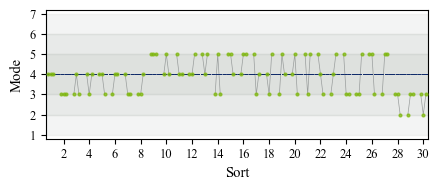

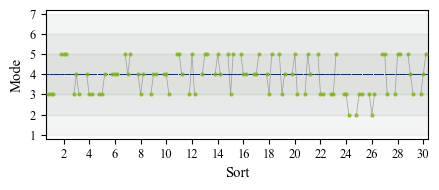

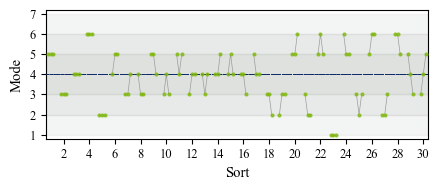

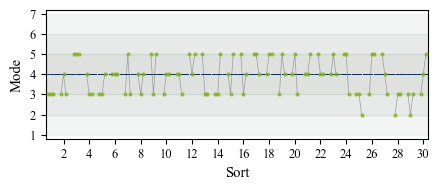

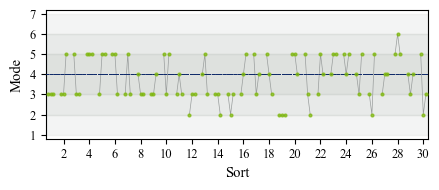

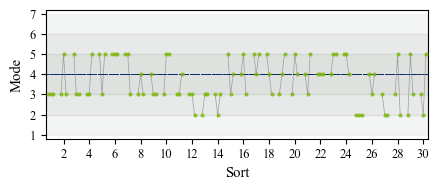

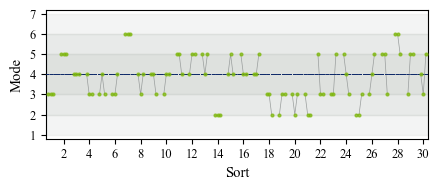

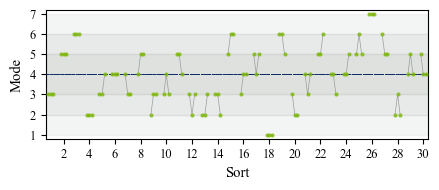

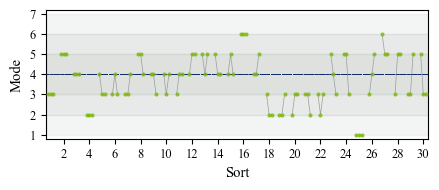

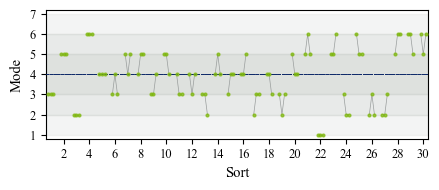

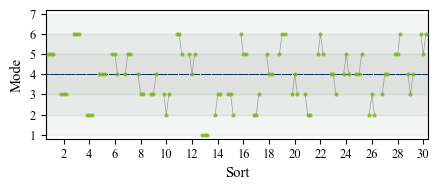

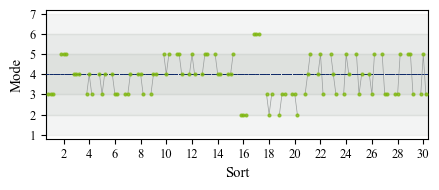

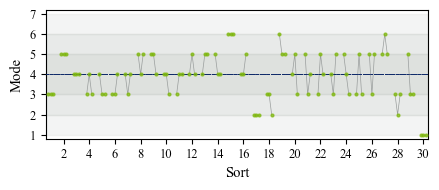

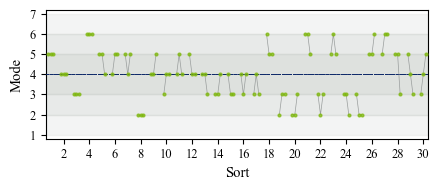

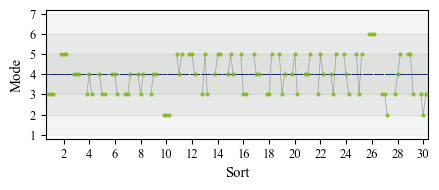

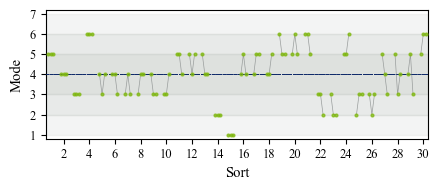

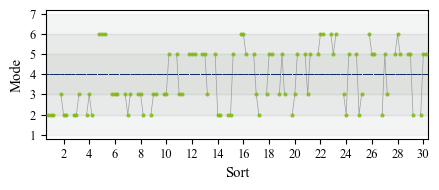

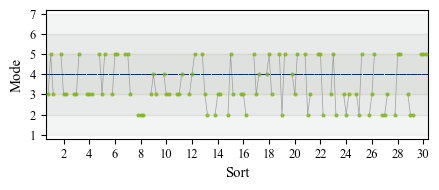

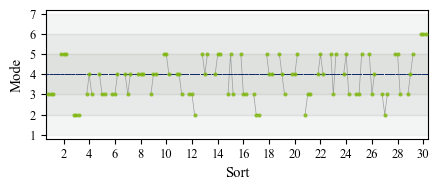

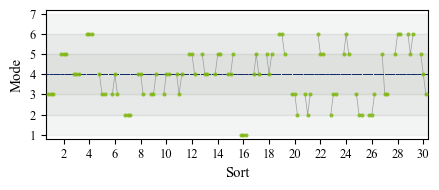

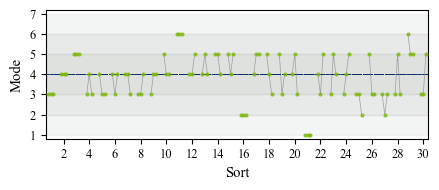

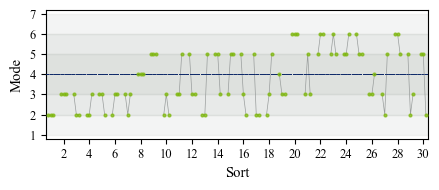

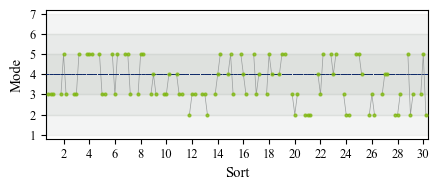

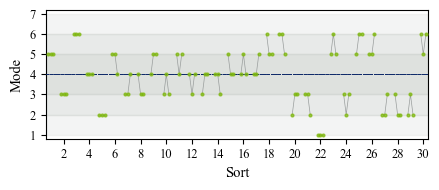

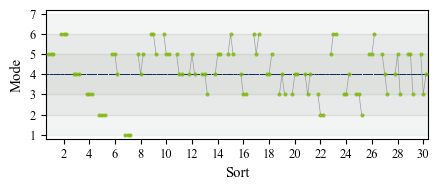

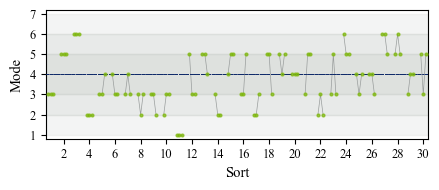

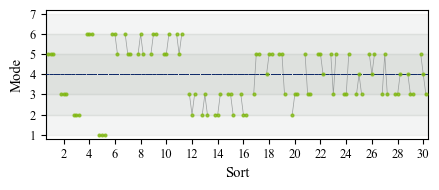

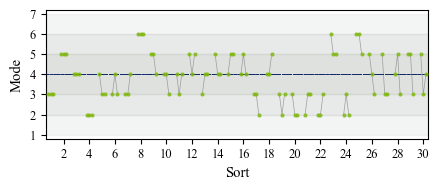

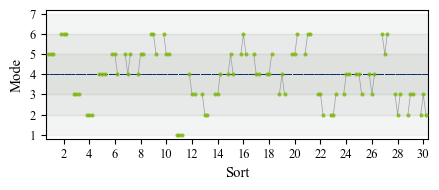

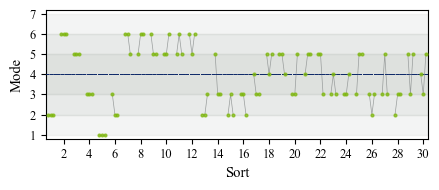

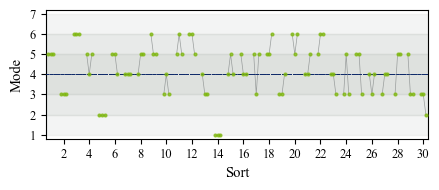

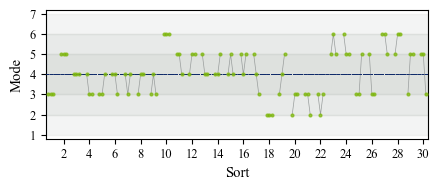

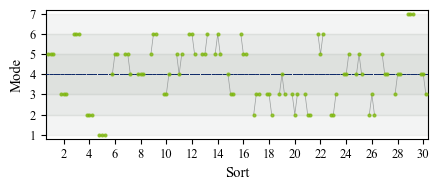

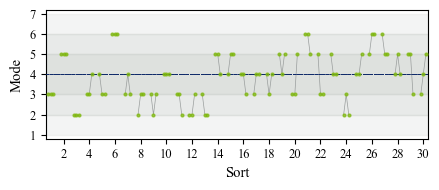

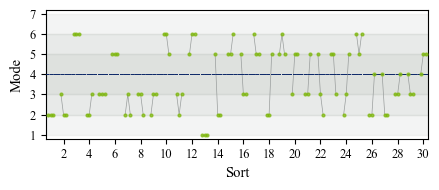

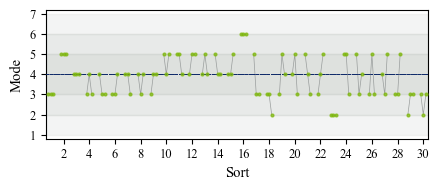

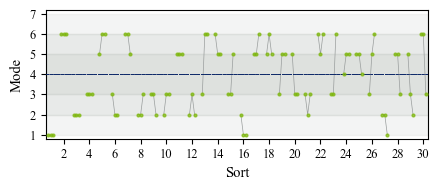

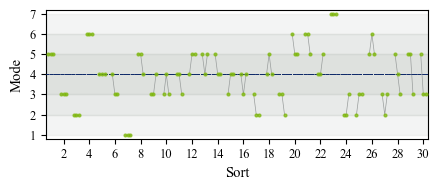

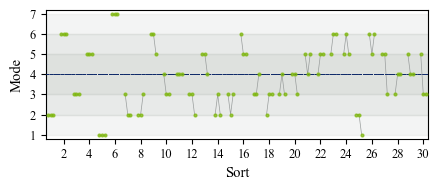

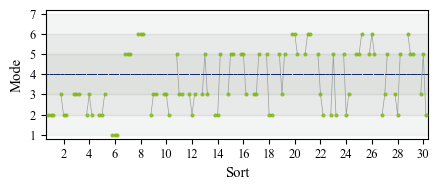

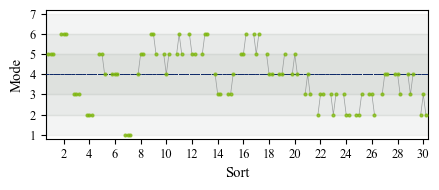

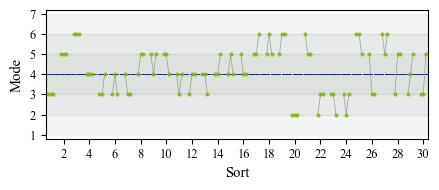

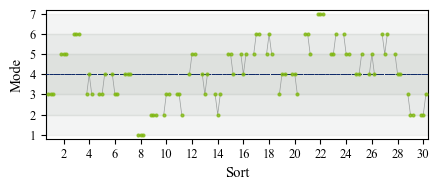

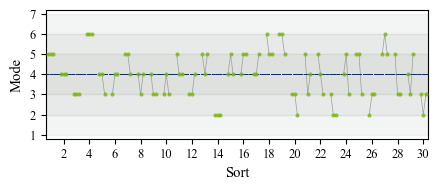

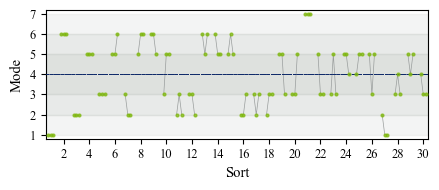

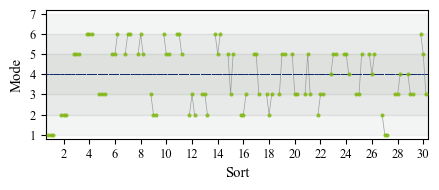

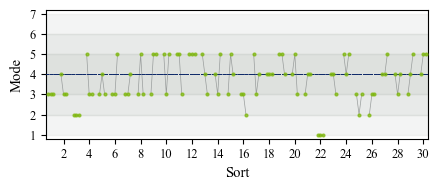

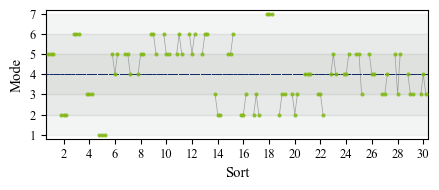

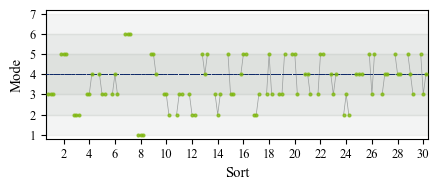

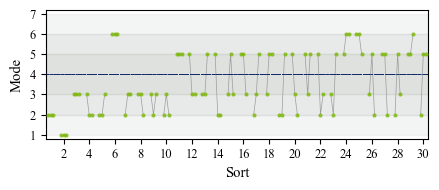

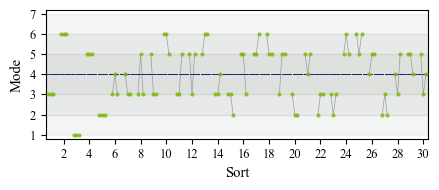

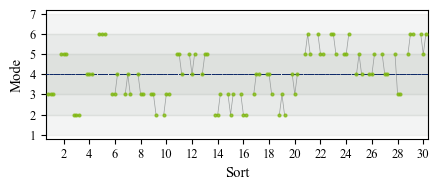

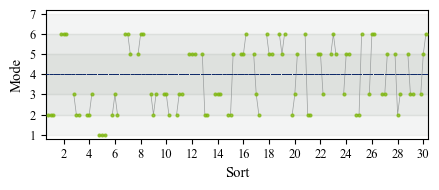

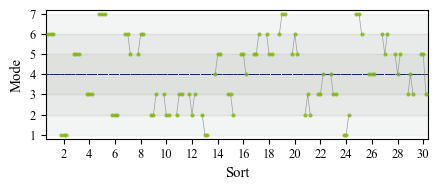

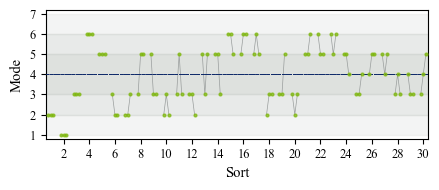

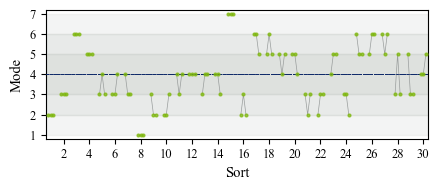

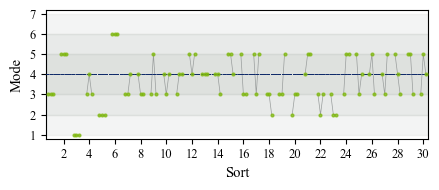

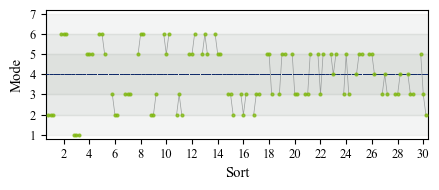

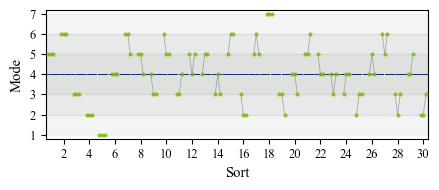

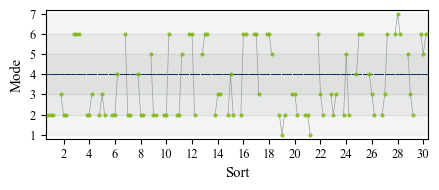

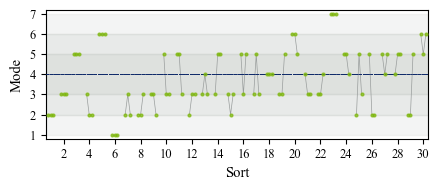

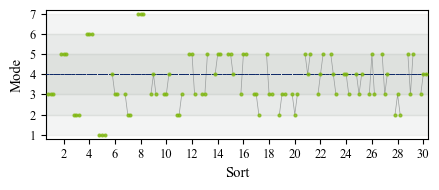

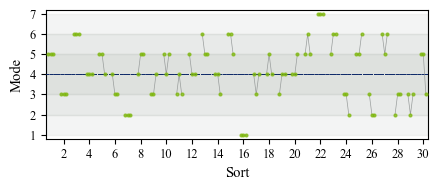

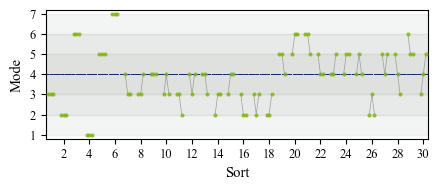

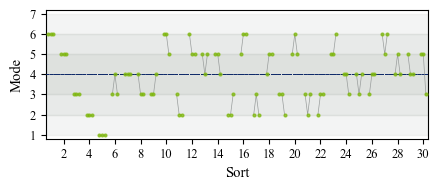

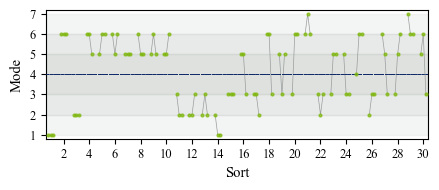

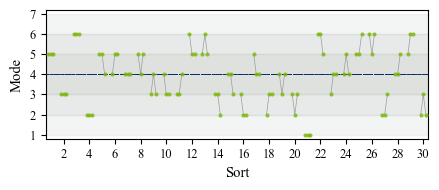

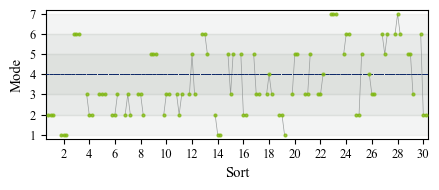

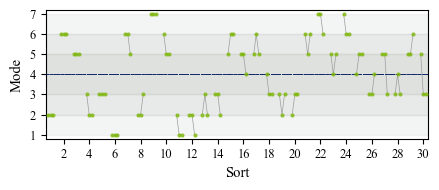

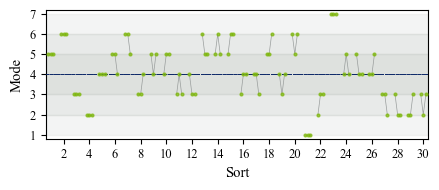

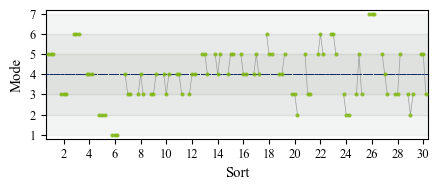

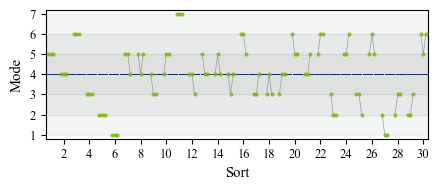

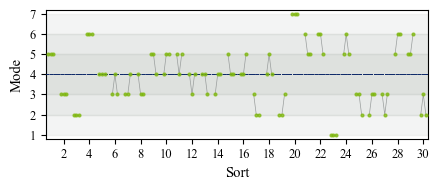

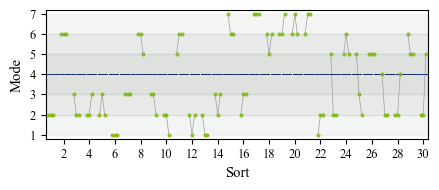

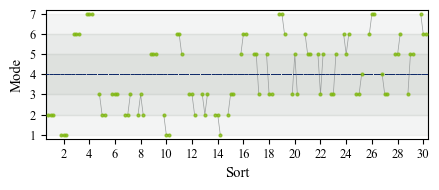

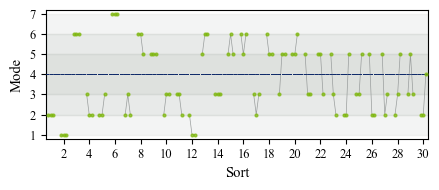

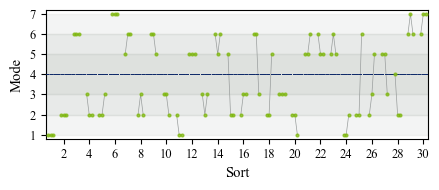

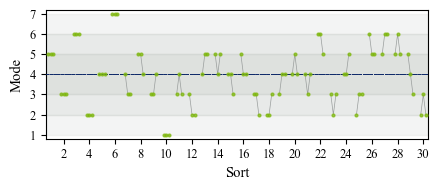

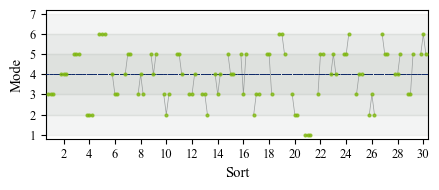

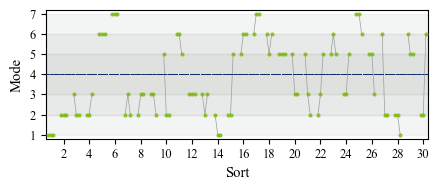

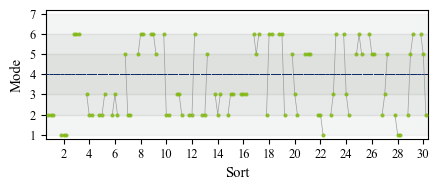

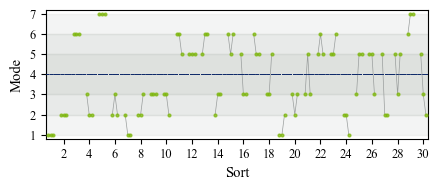

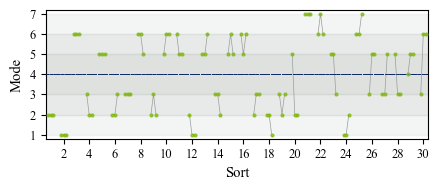

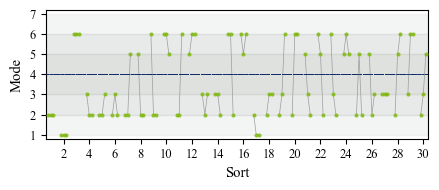

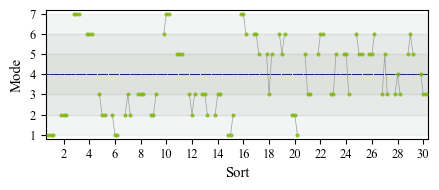

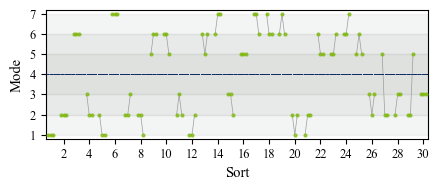

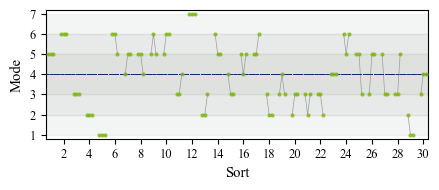

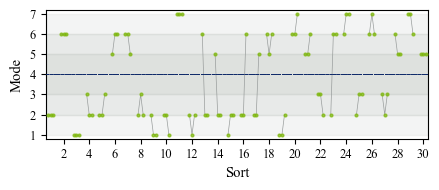

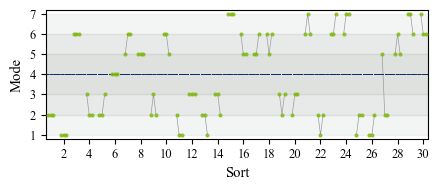

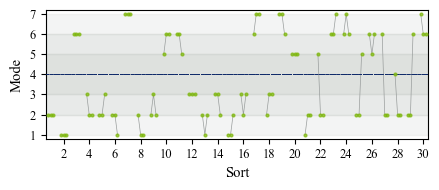

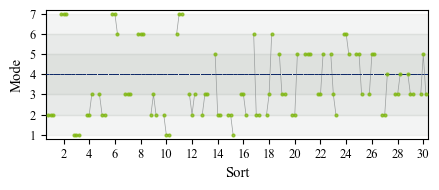

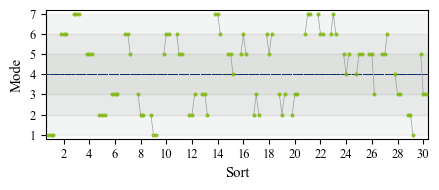

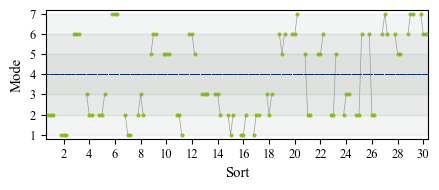

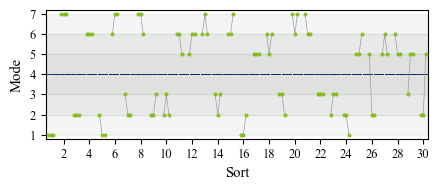

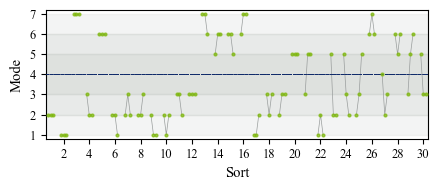

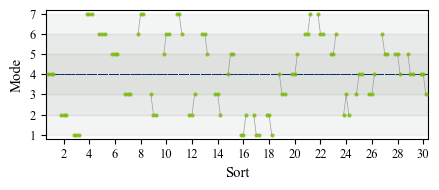

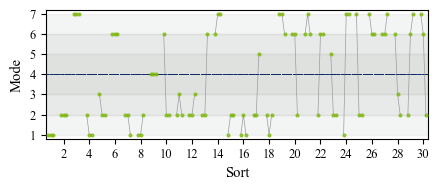

In [31]:
for i in range(len(all_warn_statis)):
    phone = all_warn_statis['phone'].iloc[i]
    mode_statis_sample = mode_statis[mode_statis['phone']==phone]
    mode_statis_sample = mode_statis_sample.sort_values('mode_count',ascending=False)
    mode_statis_sample['col1'] = mode_statis_sample['mode']// 100 % 10
    mode_statis_sample['col2'] = mode_statis_sample['mode']// 10 % 10
    mode_statis_sample['col3'] = mode_statis_sample['mode']% 10
    show_mode_freq(mode_statis_sample)
    plt.savefig('../GpsFigure/驾驶员行为图谱/D{}行为图谱.pdf'.format(i+1))